## Linear Regression

In [1]:
# Reproduce results
set.seed(1234567)

### Data-Set

In [2]:
# Random data in which y is a noisy function of x
X <- runif(100, -5, 5)
y <- X + rnorm(100) + 3

### 1. Linear Regression in R


Call:
lm(formula = y ~ X)

Coefficients:
(Intercept)            X  
     2.9455       0.9519  



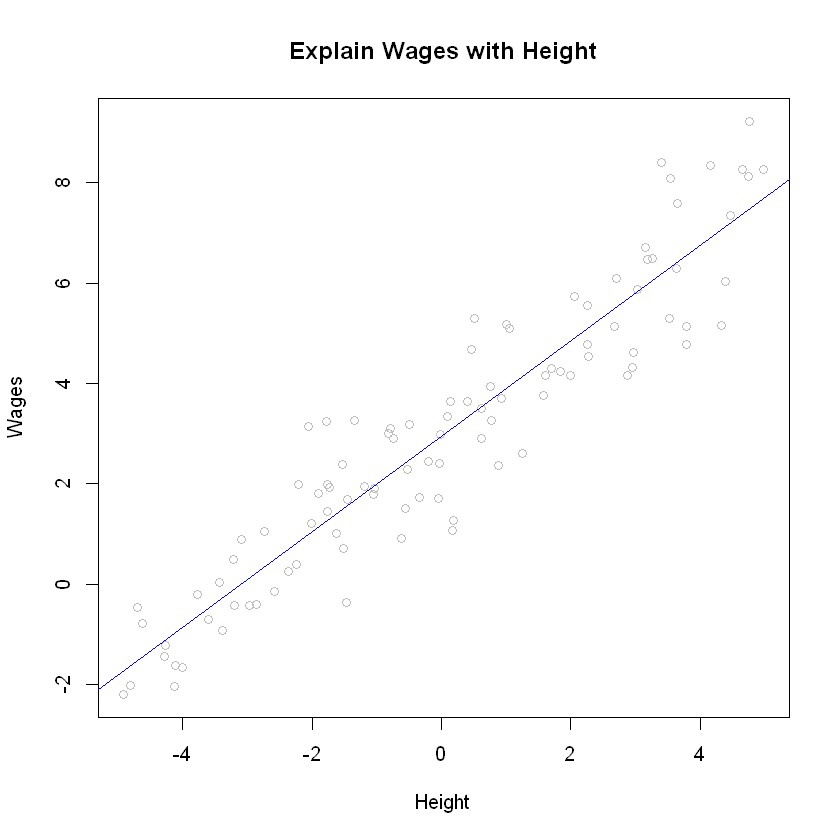

In [3]:
# Fit a model (regress weight on height)
fit <- lm(y ~ X)
print(fit)
# Coefficients:
#(Intercept)            X  
#     2.9455       0.9519 

# beta-hat
fit_params <- fit$coefficients

# Plot
plot(x=X, y=y, cex = 1, col = "grey",
     main = "Explain Wages with Height", xlab = "Height", ylab = "Wages")

# Draw the regression line (intercept, slope)
abline(a=fit_params[[1]], b=fit_params[[2]], col="blue") 

### 2. Linear Regression from Scratch

We assume that `X` is an `N x k` matrix, where we have `K` variables for `N` observations:

\begin{equation*} 
   y = X\beta + \epsilon
\end{equation*}

The vector of residuals is thus:

\begin{equation*} 
   e = y - X\beta^{OLS}
\end{equation*}

Where OLS indicates that this is the Ordinary Least Squares estimate of $\beta$

The OLS estimate minimises the sum of squared residuals:

\begin{equation*} 
   e'e = (y - X\beta^{OLS})'(y - X\beta^{OLS})
\end{equation*}
  
We take the derivative of this w.r.t to beta-hat and set it equal to 0:

\begin{equation*} 
   0 = -2X'y + 2X'X\beta^{OLS}
\end{equation*}

Assuming that the matrix `X'X` is non-singular, we can invert it and get the closed-form solution:

\begin{equation*} 
   \beta^{OLS} = (X'X)^{-1}X'y
\end{equation*}


           [,1]
intcpt 2.945535
       0.951942


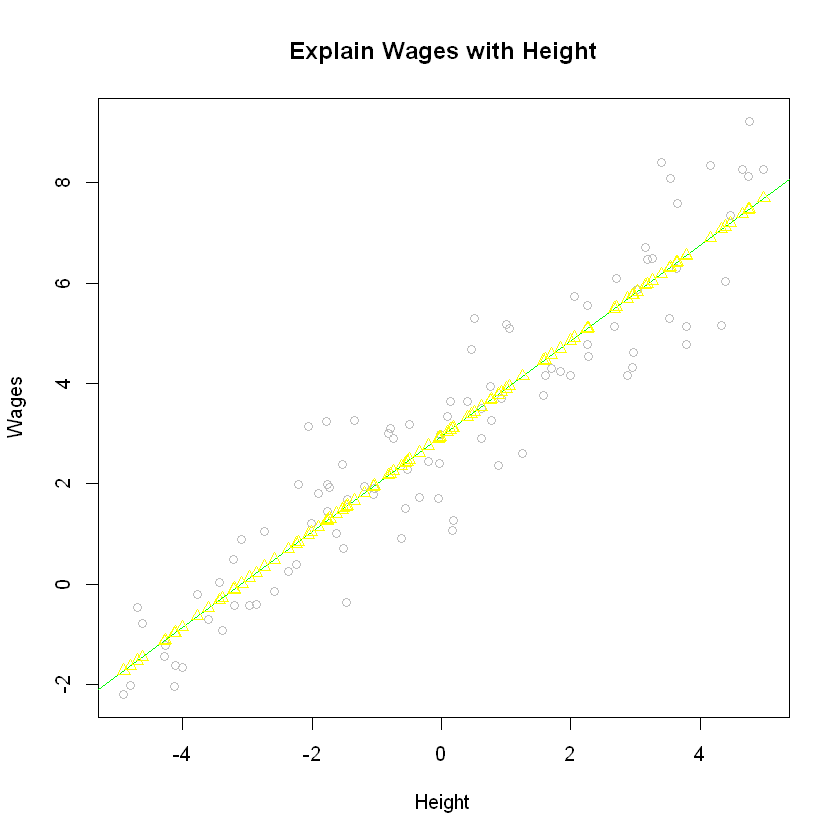

In [4]:
# Matrix of predictors (we only have one in this example)
X_mat <- as.matrix(X)
# Add column of 1s for intercept coefficient
intcpt <- rep(1, length(y))

# Combine predictors with intercept
X_mat <- cbind(intcpt, X_mat)

# OLS (closed-form solution)
beta_hat <- solve(t(X_mat) %*% X_mat) %*% t(X_mat) %*% y
print(beta_hat)
# 2.945535, 0.951942

# Plot
plot(x=X, y=y, cex = 1, col = "grey",
     main = "Explain Wages with Height", xlab = "Height", ylab = "Wages")

# Draw the previous regression line
abline(a=fit_params[[1]], b=fit_params[[2]], col="blue")
# Current regression line
abline(a=beta_hat[[1]], b=beta_hat[[2]], col="green")

# To get y-hat:
y_hat <- X_mat %*% beta_hat
points(x=X, y=y_hat, pch = 2, col='yellow')

Above we mentioned the assumption that the matrix $X'X$ is not-singular; below are two examples when this will fail and we cannot calculate the inverse:

In [5]:
dim(X_mat)  # 100 by 2
inv <- solve(t(X_mat) %*% X_mat)
dim(inv)  # Possible to invert

# 1. We have a column that is a (perfect) linear combo of another
X_mat_fail <- cbind((10*X_mat[,1])+8, X_mat)
inv <- try(solve(t(X_mat_fail) %*% X_mat_fail), silent = TRUE)
dim(inv)  # Couldn't invert

# 2. We have more variables than observations
X_mat_fail <- matrix(runif(100, -5, 5), nrow=10, ncol=20)
inv <- try(solve(t(X_mat_fail) %*% X_mat_fail), silent = TRUE)
dim(inv)  # Couldn't invert

[1] 100   2

[1] 2 2

NULL

NULL

### 3. Linear Regression with Gradient Descent

In [6]:
gradient_descent <- function(X, y, lr, epochs)
{
  X_mat <- cbind(1, X)
  # Initialise beta_hat matrix
  beta_hat <- matrix(0.1, nrow=ncol(X_mat))
  for (j in 1:epochs)
  {
    residual <- (X_mat %*% beta_hat) - y
    delta <- (t(X_mat) %*% residual) * (1/nrow(X_mat))
    beta_hat <- beta_hat - (lr*delta)
    # Draw the regression line each epoch
    abline(a=beta_hat[[1]], b=beta_hat[[2]], col="grey")
  }
  # Return 
  beta_hat
}

      [,1]
  2.945535
X 0.951942


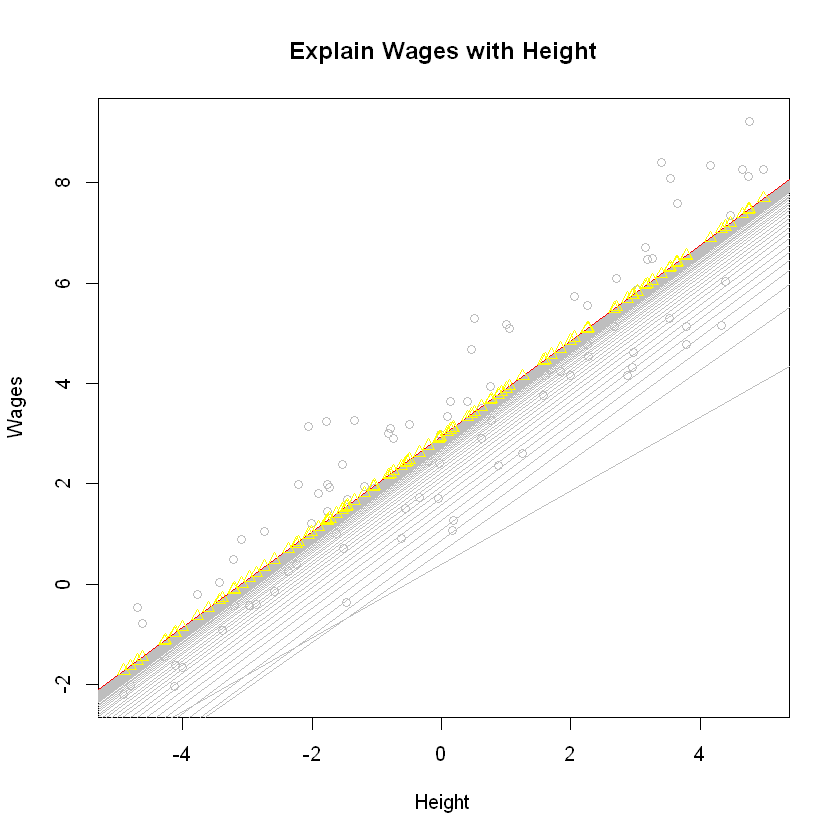

In [7]:
# Plot
plot(x=X, y=y, cex = 1, col = "grey",
     main = "Explain Wages with Height", xlab = "Height", ylab = "Wages")

beta_hat <- gradient_descent(X, y, 0.1, 200)
print(beta_hat)
# 2.945535, 0.951942

# Draw the regression line
abline(a=beta_hat[[1]], b=beta_hat[[2]], col="red")

# To get y-hat:
y_hat <- X_mat %*% beta_hat
points(x=X, y=y_hat, pch = 2, col='yellow')